In [10]:
!pip install split-folders

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
!ls '/content/drive/My Drive/skripsiku/Data/data_mentah'

SBW_B  SBW_K  SBW_SB  SBW_SK


In [13]:
import splitfolders
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [11]:
input_folder = '/content/drive/My Drive/skripsiku/Data/data_mentah'
output_folder = '/content/drive/MyDrive/skripsiku/Data/split_data'

# Bagi data dengan rasio: 70% train, 20% val, 10% test
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.7, .2, .1), move=False)

Copying files: 800 files [00:52, 15.37 files/s]


In [16]:
base_path = '/content/drive/My Drive/skripsiku/Data/split_data/'  # ganti sesuai path kamu
sets = ['train', 'val', 'test']

print("Jumlah data per kategori:")
for category in os.listdir(os.path.join(base_path, 'train')):
    print(f"\nKategori: {category}")
    for s in sets:
        folder = os.path.join(base_path, s, category)
        count = len(os.listdir(folder)) if os.path.exists(folder) else 0
        print(f"  {s:<5}: {count} file")

Jumlah data per kategori:

Kategori: SBW_B
  train: 140 file
  val  : 40 file
  test : 20 file

Kategori: SBW_K
  train: 140 file
  val  : 40 file
  test : 20 file

Kategori: SBW_SK
  train: 140 file
  val  : 40 file
  test : 20 file

Kategori: SBW_SB
  train: 140 file
  val  : 40 file
  test : 20 file


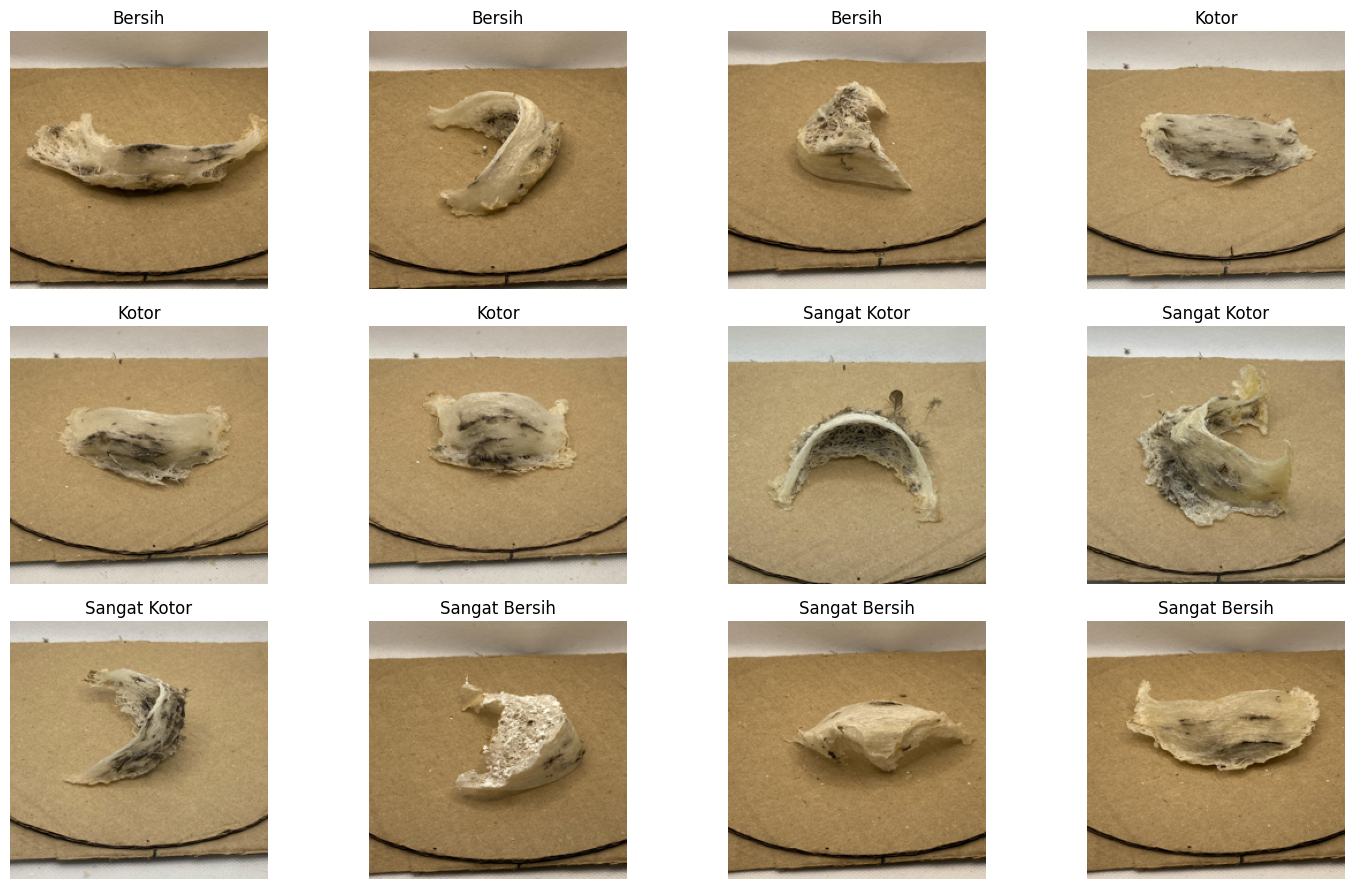

In [18]:
data_dir = '/content/drive/My Drive/skripsiku/Data/split_data/train'
label_map = {
    'SBW_K': 'Kotor',
    'SBW_B': 'Bersih',
    'SBW_SK': 'Sangat Kotor',
    'SBW_SB': 'Sangat Bersih'
}

# Parameter
num_images = 12
target_size = (224, 224)

# Ambil semua gambar dari semua folder
image_paths = []
for class_folder in os.listdir(data_dir):
    full_path = os.path.join(data_dir, class_folder)
    if os.path.isdir(full_path):
        images = [os.path.join(full_path, f) for f in os.listdir(full_path)
                  if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        selected = random.sample(images, min(len(images), num_images // 4))
        image_paths.extend(selected)

# Tambah jika kurang dari num_images
if len(image_paths) < num_images:
    more_needed = num_images - len(image_paths)
    image_paths += random.sample(image_paths, more_needed)

# Tampilkan
cols = 4
rows = (num_images + cols - 1) // cols
plt.figure(figsize=(15, rows * 3))

for i, img_path in enumerate(image_paths[:num_images]):
    img = Image.open(img_path).resize(target_size)
    label = os.path.basename(os.path.dirname(img_path))
    label = label_map.get(label, label)

    plt.subplot(rows, cols, i + 1)
    plt.imshow(np.array(img) / 255.0)
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()